In [14]:
%matplotlib inline
import pandas as pd
import numpy as np
import plotly 
import plotly.plotly as py 
import plotly.figure_factory as ff
from plotly.graph_objs import *
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import cufflinks as cf
plotly.tools.set_credentials_file(username='bkeljaba', api_key='jIBy5jbNKdIUxlbVK2Kd')

### Read the GDP per capita data set with pandas
GDP per capita is the total output divided by the number of people in the population, so you can get a figure of the average output of each person, i.e., the average amount of money each person makes(Kern)
https://applebutterdreams.wordpress.com/the-difference-between-gdp-nominal-and-gdp-ppp/

In [2]:
GDPPerCapita = pd.read_csv("../data/GDP_per_capita(US$)/GDP_per_capita.csv", sep="\t", engine='python', encoding ='latin1')                 
GDPPerCapita.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,25921.026050,27546.899390,24631.434860,24271.940420,25324.720360,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP per capita (current US$),NY.GDP.PCAP.CD,59.777327,59.878153,58.492874,78.782758,82.208444,101.290471,...,369.835796,373.361116,445.893298,553.300289,603.537023,669.009051,631.744971,612.069651,584.025902,561.778746
2,Angola,AGO,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2878.837144,3868.578883,3347.844850,3529.053482,4299.012889,4598.249988,4804.616884,4709.312024,3695.793748,3110.808183
3,Albania,ALB,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3603.013685,4370.539647,4114.136545,4094.358832,4437.178068,4247.614308,4414.723140,4575.763787,3954.022783,4146.896250
4,Andorra,AND,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,48510.467280,47712.299080,43215.687010,39627.663520,40919.183280,38167.095750,40215.435320,NaN,NaN,NaN


### Clean the food deficit data set with pandas
1. Any row that is completely empty is dropped
2. Any column that is empty is dropped
3. The Indicator Code column is dropped because it is not needed

In [3]:
def cleanDataSets(df):
    # dropping empty rows 
    df2=df.dropna(subset=['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002',
                 '2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016'], 
                  how='all')
    # dropping empty columns 
    df3=df2.dropna(axis=1, how='all')
    df4=df3.drop('Indicator Code',axis=1)
    df5=df4.drop('Indicator Name',axis=1)
    return df5

In [4]:
filteredGDPPerCapita = cleanDataSets(GDPPerCapita)
filteredGDPPerCapita.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25921.026050,27546.899390,24631.434860,24271.940420,25324.720360,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,59.777327,59.878153,58.492874,78.782758,82.208444,101.290471,137.899362,161.322,...,369.835796,373.361116,445.893298,553.300289,603.537023,669.009051,631.744971,612.069651,584.025902,561.778746
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2878.837144,3868.578883,3347.844850,3529.053482,4299.012889,4598.249988,4804.616884,4709.312024,3695.793748,3110.808183
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3603.013685,4370.539647,4114.136545,4094.358832,4437.178068,4247.614308,4414.723140,4575.763787,3954.022783,4146.896250
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48510.467280,47712.299080,43215.687010,39627.663520,40919.183280,38167.095750,40215.435320,NaN,NaN,NaN


## Put the data frame in a pickle file
This is down because so we do not have to run the above code everytime and can just use the pickle file

In [5]:
filteredGDPPerCapita.to_pickle("GDP_per_capita_pickle")

In [6]:
filteredGDPPerCapita=pd.read_pickle("GDP_per_capita_pickle")
filteredGDPPerCapita.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25921.026050,27546.899390,24631.434860,24271.940420,25324.720360,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,59.777327,59.878153,58.492874,78.782758,82.208444,101.290471,137.899362,161.322,...,369.835796,373.361116,445.893298,553.300289,603.537023,669.009051,631.744971,612.069651,584.025902,561.778746
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2878.837144,3868.578883,3347.844850,3529.053482,4299.012889,4598.249988,4804.616884,4709.312024,3695.793748,3110.808183
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3603.013685,4370.539647,4114.136545,4094.358832,4437.178068,4247.614308,4414.723140,4575.763787,3954.022783,4146.896250
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48510.467280,47712.299080,43215.687010,39627.663520,40919.183280,38167.095750,40215.435320,NaN,NaN,NaN


In [7]:
year = input('Enter year to plot: ')
filteredGDPPerCapita.iplot( x=str(year), y='Country Name', kind='scatter', filename='GDP_per_capita'+str(year))

Enter year to plot: 1992


# Ploting using Matplotlib
Plotting the same data in matplotlib seems to give us a graph that is harder to read in terms of the axises

Enter year to plot: 1992


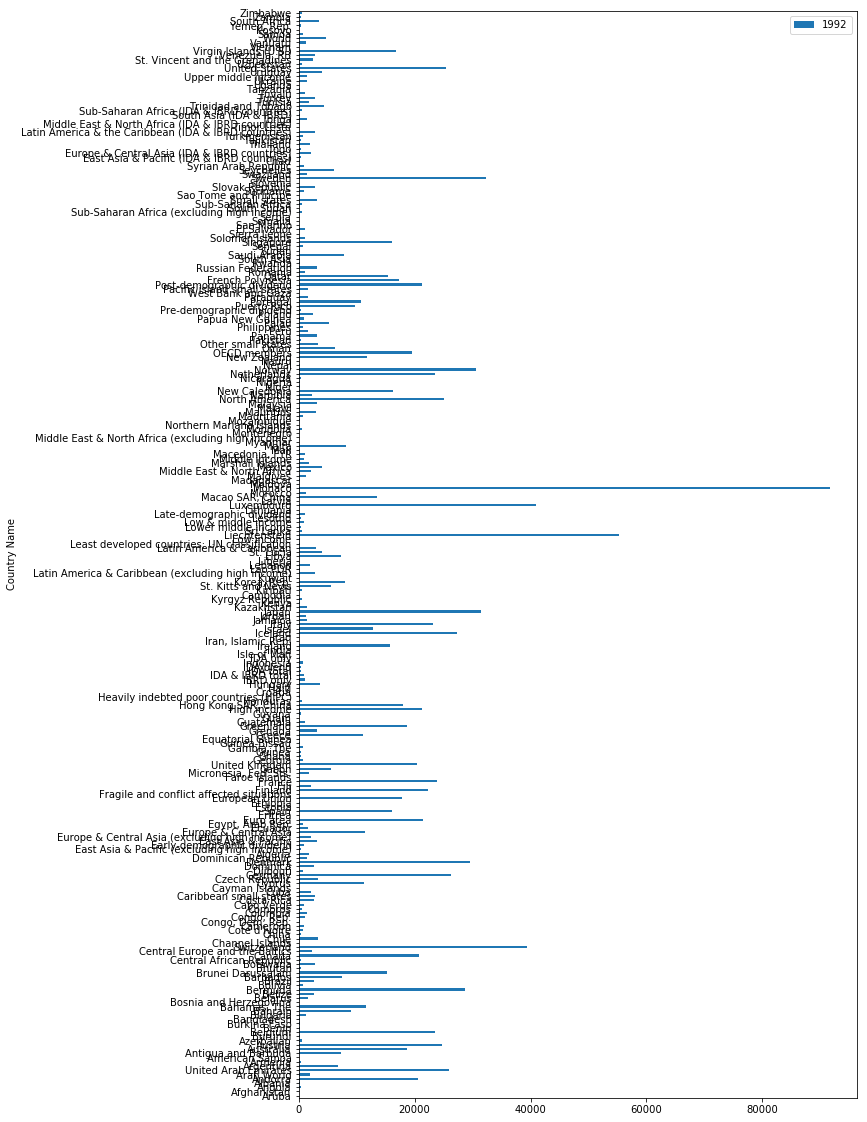

In [8]:
year = input('Enter year to plot: ')
filteredGDPPerCapita.plot(kind='barh', x='Country Name', y=str(year), figsize=(10,20))

### I want to be able to easily look at every year for one country. It is easier to do this by setting the index column to name of countries when reading the csv

In [9]:
#Refugee by country of origin (will be used later)
refugeeByCountry = pd.read_csv("../data/ref_by_c_orig/ref_by_c_orig.csv", engine='python', encoding ='latin1',
                               index_col = 'Country Name')
filteredRefugeeByCountry = cleanDataSets(refugeeByCountry)
filteredRefugeeByCountry = filteredRefugeeByCountry.drop('Country Code', axis=1)

#GDPPerCapita
GDPPerCapita =pd.read_csv("../data/GDP_per_capita(US$)/GDP_per_capita.csv", sep="\t", engine='python', encoding ='latin1',
                         index_col = 'Country Name')               
filteredGDPPerCapita = cleanDataSets(GDPPerCapita)
filteredGDPPerCapita =filteredGDPPerCapita.drop('Country Code', axis=1)
#Since filtered refugee by country of origin only goes back to 1990, we should drop 1960-1989 for better comparison later
filteredGDPPerCapita = filteredGDPPerCapita.drop(filteredGDPPerCapita.columns[1:31], axis=1)
filteredGDPPerCapita.head()

,1960,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,17342.471940,16441.790640,16585.195530,17926.572840,19081.351660,19356.203390,...,25921.026050,27546.899390,24631.434860,24271.940420,25324.720360,NaN,NaN,NaN,NaN,NaN
Afghanistan,59.777327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,369.835796,373.361116,445.893298,553.300289,603.537023,669.009051,631.744971,612.069651,584.025902,561.778746
Angola,NaN,965.361296,438.320520,393.784521,293.278222,353.182045,512.620966,506.884952,415.693346,385.768854,...,2878.837144,3868.578883,3347.844850,3529.053482,4299.012889,4598.249988,4804.616884,4709.312024,3695.793748,3110.808183
Albania,NaN,348.711318,218.492166,380.527371,619.065163,760.559376,1046.358511,749.584649,865.302162,1098.425463,...,3603.013685,4370.539647,4114.136545,4094.358832,4437.178068,4247.614308,4414.723140,4575.763787,3954.022783,4146.896250
Andorra,NaN,19532.540150,20547.711790,16516.471030,16234.809010,18461.064860,19017.174590,18353.059720,18894.521500,19261.710500,...,48510.467280,47712.299080,43215.687010,39627.663520,40919.183280,38167.095750,40215.435320,NaN,NaN,NaN


#### Plot all years of a country's GDP per capita based on input
* Take input
* retrieve the row from dataframe
* place the row in the plot
* set axis labels then plot

Enter country to plot:Armenia


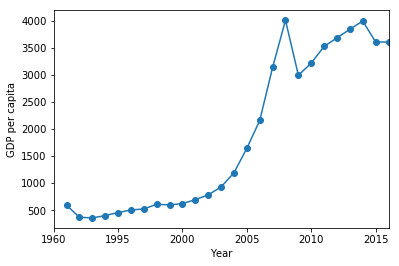

In [10]:
country = raw_input('Enter country to plot:')
row = filteredGDPPerCapita.loc[country]
ax = row.plot(kind='line', marker='o')
ax.set_xlabel("Year")
ax.set_ylabel("GDP per capita")
plt.show()

#### Plot all years of refugees by country of origin based on input
* Take input
* retrieve the row from dataframe
* place the row in the plot
* set axis labels then plot

Enter country to plot:Armenia


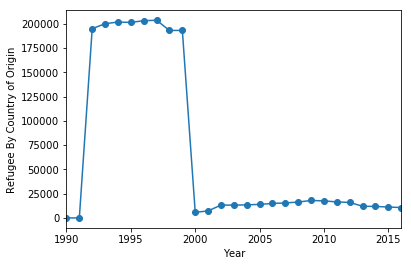

In [11]:
country = raw_input('Enter country to plot:')
row = filteredRefugeeByCountry.loc[country]
ax = row.plot(kind='line', marker='o')
ax.set_xlabel("Year")
ax.set_ylabel("Refugee By Country of Origin")
plt.show()

#### Plotting one country based on input for GDP per capita and refugees by country of asylum

Enter country to plot:Rwanda


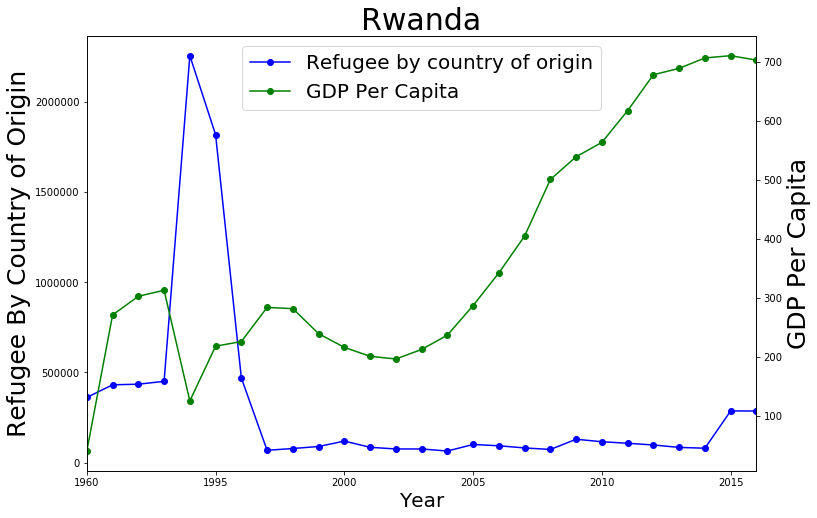

In [40]:
country = raw_input('Enter country to plot:')
refugeeRow = filteredRefugeeByCountry.loc[country]
GDPPerCapitaRow = filteredGDPPerCapita.loc[country]

fig, ax1 = plt.subplots()
fig.set_size_inches(12,8)

blue_line = mlines.Line2D([], [], color='blue', marker='o',
                           label='Refugee by country of origin')

ax1 = refugeeRow.plot(kind='line', marker='o', color = 'b')
ax1.set_xlabel("Year", fontsize=20)
ax1.set_ylabel("Refugee By Country of Origin",  fontsize=25)
ax2 = ax1.twinx()
green_line = mlines.Line2D([], [], color='green', marker='o',
                           label='GDP Per Capita')
ax2 = GDPPerCapitaRow.plot(kind='line', marker='o', color = 'g')

ax2.set_ylabel('GDP Per Capita',  fontsize=25)
plt.legend(handles=[blue_line, green_line], loc='upper center', prop={'size': 20})
plt.title(str(country), fontsize=30)
fig.savefig('GDPPerCapitaVsRefugeeByOrigin.png')
plt.show()